In [27]:
import os
from datetime import datetime
import numpy as np

# Directory containing the .npz files
directory_path = "/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg"

# Initialize dictionaries to store time series data
time_series_data = {"time": []}

# Define species names and groups
species_names = [
    "blank", "SMOS_fit_Tbh_A", "SMOS_fit_Tbh_D", "SMOS_fit_Tbv_A", "SMOS_fit_Tbv_D",
    "SMAP_L1C_Tbh_A", "SMAP_L1C_Tbh_D", "SMAP_L1C_Tbv_A", "SMAP_L1C_Tbv_D",
    "ASCAT_META_SM", "ASCAT_METB_SM", "ASCAT_METC_SM", "MYD10C1", "MOD10C1"
]

species_groups = {
    "SMOS": [1, 2, 3, 4],
    "SMAP": [5, 6, 7, 8],
    "ASCAT": [9, 10, 11],
    "MODIS": [12, 13]
}

# Exclude "blank" from species names
species_time_series = {name: [] for name in species_names if name != "blank"}

# Loop through all .npz files in the directory
for file_name in sorted(os.listdir(directory_path)):
    if file_name.endswith(".npz"):
        try:
            # Parse the time from the file name (e.g., 202303 from LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.summed.202303.npz)
            time_str = file_name.split(".")[-2]
            time = datetime.strptime(time_str, "%Y%m")

            # Load the .npz file
            file_path = os.path.join(directory_path, file_name)
            data = np.load(file_path)

            # Sum across tiles for each species
            species_sum = np.sum(data["obs_cnt"], axis=0)

            # Sum data for each group
            group_sums = {group: np.sum(species_sum[indices]) for group, indices in species_groups.items()}

            # Append the data to the time series for groups
            time_series_data["time"].append(time)
            for group, total in group_sums.items():
                if group not in time_series_data:
                    time_series_data[group] = []
                time_series_data[group].append(total)

            # Append the data to the time series for individual species
            for name, total in zip(species_names, species_sum):
                if name != "blank":
                    species_time_series[name].append(total)

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

# Display the collected time series data for groups
print("Collected time series data for groups:")
for group, values in time_series_data.items():
    print(f"{group}: {values}")

# Display the collected time series data for individual species
print("\nCollected time series data for individual species:")
for species, values in species_time_series.items():
    print(f"{species}: {values}")

Collected time series data for groups:
time: [datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 2, 1, 0, 0), datetime.datetime(2022, 3, 1, 0, 0), datetime.datetime(2022, 4, 1, 0, 0), datetime.datetime(2022, 5, 1, 0, 0), datetime.datetime(2022, 6, 1, 0, 0), datetime.datetime(2022, 7, 1, 0, 0), datetime.datetime(2022, 8, 1, 0, 0), datetime.datetime(2022, 9, 1, 0, 0), datetime.datetime(2022, 10, 1, 0, 0), datetime.datetime(2022, 11, 1, 0, 0), datetime.datetime(2022, 12, 1, 0, 0), datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2023, 3, 1, 0, 0), datetime.datetime(2023, 4, 1, 0, 0), datetime.datetime(2023, 5, 1, 0, 0), datetime.datetime(2023, 6, 1, 0, 0), datetime.datetime(2023, 7, 1, 0, 0), datetime.datetime(2023, 8, 1, 0, 0), datetime.datetime(2023, 9, 1, 0, 0), datetime.datetime(2023, 10, 1, 0, 0), datetime.datetime(2023, 11, 1, 0, 0), datetime.datetime(2023, 12, 1, 0, 0)]
SMOS: [655813.0, 568347.0, 657300.0, 759234.0, 905440.0, 103

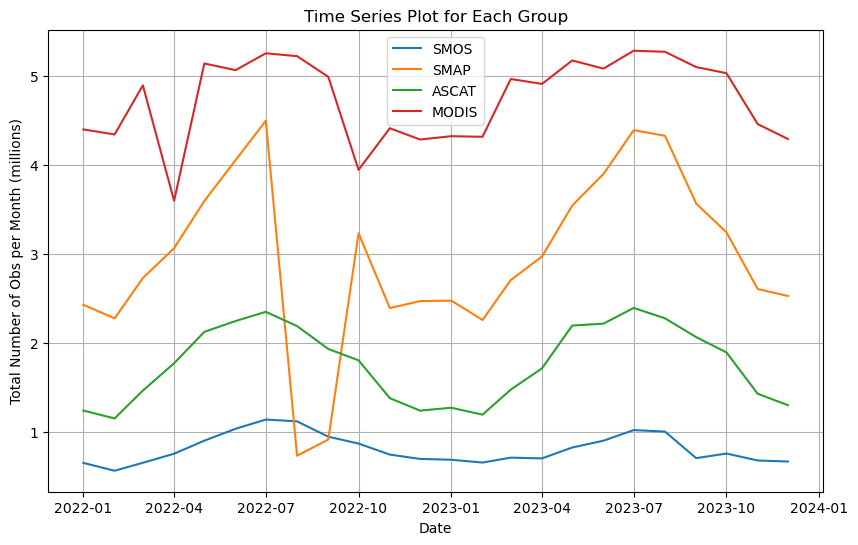

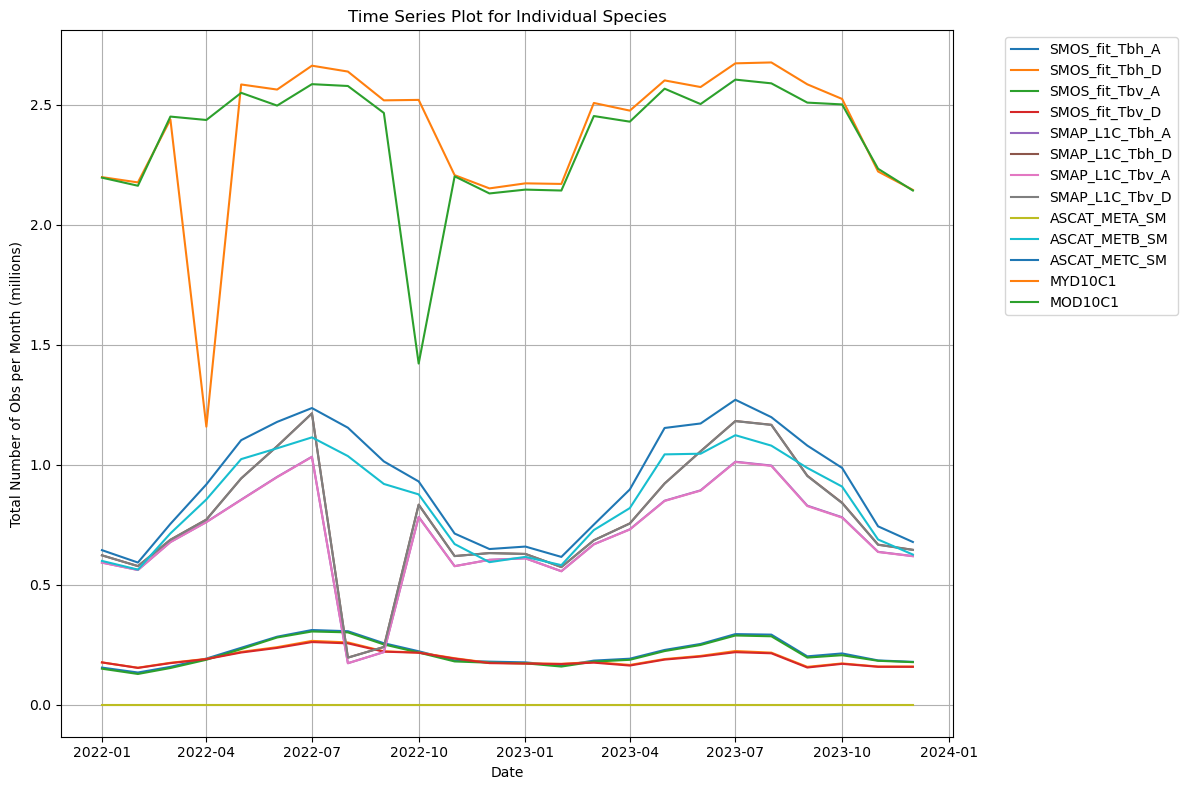

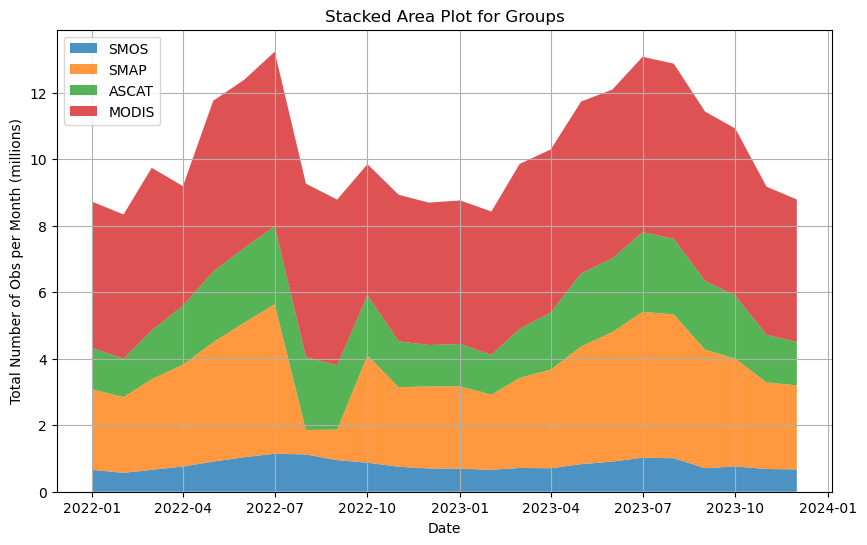

In [32]:
import matplotlib.pyplot as plt

# Convert time to a sorted list for plotting
sorted_indices = sorted(range(len(time_series_data["time"])), key=lambda i: time_series_data["time"][i])
sorted_time = [time_series_data["time"][i] for i in sorted_indices]

# Plot time series for each group
plt.figure(figsize=(10, 6))
for group in species_groups.keys():
    sorted_values = [time_series_data[group][i] / 1000000 for i in sorted_indices]  # Convert to millions
    plt.plot(sorted_time, sorted_values, label=group)

# Add labels, legend, and title for groups
plt.xlabel("Date")
plt.ylabel("Total Number of Obs per Month (millions)")
plt.title("Time Series Plot for Each Group")
plt.legend()
plt.grid(True)
plt.show()

# Plot time series for individual species
plt.figure(figsize=(12, 8))
for species in species_time_series.keys():
    sorted_values = [species_time_series[species][i] / 1000000 for i in sorted_indices]  # Convert to millions
    plt.plot(sorted_time, sorted_values, label=species)

# Add labels, legend, and title for individual species
plt.xlabel("Date")
plt.ylabel("Total Number of Obs per Month (millions)")
plt.title("Time Series Plot for Individual Species")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Stacked area plot for groups
plt.figure(figsize=(10, 6))

# Prepare data for stacking
stacked_values = np.array([[time_series_data[group][i] / 1000000 for group in species_groups.keys()] for i in sorted_indices]).T  # Convert to millions
labels = list(species_groups.keys())

# Plot stacked area chart
plt.stackplot(sorted_time, stacked_values, labels=labels, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Date")
plt.ylabel("Total Number of Obs per Month (millions)")
plt.title("Stacked Area Plot for Groups")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [29]:
from collections import defaultdict
import numpy as np

# Initialize dictionaries to store annual means
annual_means_groups = defaultdict(list)
annual_means_species = defaultdict(list)

# Group data by year
grouped_by_year = defaultdict(lambda: defaultdict(list))
species_grouped_by_year = defaultdict(lambda: defaultdict(list))

for time, group_values, species_values in zip(time_series_data["time"], 
                                              zip(*[time_series_data[group] for group in species_groups.keys()]), 
                                              zip(*[species_time_series[species] for species in species_time_series.keys()])):
    year = time.year
    for group, value in zip(species_groups.keys(), group_values):
        grouped_by_year[year][group].append(value)
    for species, value in zip(species_time_series.keys(), species_values):
        species_grouped_by_year[year][species].append(value)

# Calculate annual means for groups
for year, groups in grouped_by_year.items():
    for group, values in groups.items():
        annual_means_groups[group].append((year, np.mean(values)))

# Calculate annual means for individual species
for year, species in species_grouped_by_year.items():
    for species_name, values in species.items():
        annual_means_species[species_name].append((year, np.mean(values)))

# Display annual means for groups
print("Annual means for groups:")
for group, means in annual_means_groups.items():
    print(f"{group}: {[(year, int(mean)) for year, mean in means]}")

# Display annual means for individual species
print("\nAnnual means for individual species:")
for species, means in annual_means_species.items():
    print(f"{species}: {[(year, int(mean)) for year, mean in means]}")

Annual means for groups:
SMOS: [(2022, 843509), (2023, 780277)]
SMAP: [(2022, 2699150), (2023, 3208846)]
ASCAT: [(2022, 1743169), (2023, 1787513)]
MODIS: [(2022, 4625837), (2023, 4847098)]

Annual means for individual species:
SMOS_fit_Tbh_A: [(2022, 218020), (2023, 213063)]
SMOS_fit_Tbh_D: [(2022, 207137), (2023, 180375)]
SMOS_fit_Tbv_A: [(2022, 213090), (2023, 208630)]
SMOS_fit_Tbv_D: [(2022, 205261), (2023, 178207)]
SMAP_L1C_Tbh_A: [(2022, 648771), (2023, 765408)]
SMAP_L1C_Tbh_D: [(2022, 701223), (2023, 839783)]
SMAP_L1C_Tbv_A: [(2022, 648229), (2023, 764439)]
SMAP_L1C_Tbv_D: [(2022, 700927), (2023, 839214)]
ASCAT_META_SM: [(2022, 0), (2023, 0)]
ASCAT_METB_SM: [(2022, 836060), (2023, 853816)]
ASCAT_METC_SM: [(2022, 907108), (2023, 933696)]
MYD10C1: [(2022, 2318831), (2023, 2444591)]
MOD10C1: [(2022, 2307006), (2023, 2402507)]
